<a href="https://colab.research.google.com/github/antonsysoev/Ass/blob/main/Hierarchical_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
install.packages('neuralnet')
install.packages('NeuralNetTools')
library(nnet)
library(neuralnet)
library(NeuralNetTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [81]:
neuraldat$X4 <- (neuraldat$X1*neuraldat$X2/neuraldat$X3) / 400
neuraldat$X5 <- sin(neuraldat$X1)
neuraldat$Z <- exp(neuraldat$Y1)*neuraldat$Y2

In [82]:
summary(neuraldat)

       Y1               Y2               X1                 X2          
 Min.   :0.0000   Min.   :0.0000   Min.   :-4.07522   Min.   :-3.92584  
 1st Qu.:0.3742   1st Qu.:0.3576   1st Qu.:-0.64377   1st Qu.:-0.63255  
 Median :0.4641   Median :0.4469   Median : 0.04648   Median : 0.05394  
 Mean   :0.4656   Mean   :0.4477   Mean   : 0.04151   Mean   : 0.04497  
 3rd Qu.:0.5537   3rd Qu.:0.5381   3rd Qu.: 0.71727   3rd Qu.: 0.72451  
 Max.   :1.0000   Max.   :1.0000   Max.   : 3.53988   Max.   : 3.30277  
       X3                 X4                   X5                 Z         
 Min.   :-3.43596   Min.   :-1.1471426   Min.   :-1.00000   Min.   :0.0000  
 1st Qu.:-0.63142   1st Qu.:-0.0015342   1st Qu.:-0.58651   1st Qu.:0.5444  
 Median : 0.01116   Median : 0.0000224   Median : 0.04578   Median :0.7074  
 Mean   : 0.01198   Mean   :-0.0004311   Mean   : 0.02352   Mean   :0.7330  
 3rd Qu.: 0.64531   3rd Qu.: 0.0017118   3rd Qu.: 0.63725   3rd Qu.:0.9029  
 Max.   : 2.90699   Max.   

In [83]:
# cor(neuraldat)

In [84]:
submod_1 <-  neuralnet(Y1 ~ X1 + X2 + X4, neuraldat, hidden=2, act.fct = "logistic", linear.output = FALSE)

In [85]:
submod_2 <-  neuralnet(Y2 ~ X3 + X5, neuraldat, hidden=1, act.fct = "logistic", linear.output = FALSE)

In [86]:
df <- data.frame(Z=neuraldat$Z, Y_1 = as.numeric(unlist(submod_1$net.result)), Y_2 = as.numeric(unlist(submod_2$net.result)))

In [87]:
model_0 <- neuralnet(Z ~ Y_1 + Y_2, df, hidden=2, act.fct = "logistic", linear.output = FALSE)

In [88]:
# data.frame(pred= model_0$net.result, real = df$Z)

In [89]:
model_0$result.matrix

error,1.436414e+01
reached.threshold,9.968975e-03
steps,8.612000e+03
Intercept.to.1layhid1,4.349685e+01
Y_1.to.1layhid1,-2.991613e+01
Y_2.to.1layhid1,-4.662584e+01
Intercept.to.1layhid2,-1.266673e+00
Y_1.to.1layhid2,1.142430e+00
Y_2.to.1layhid2,2.574673e+00
Intercept.to.Z,1.522192e+00
1layhid1.to.Z,-6.580659e+00


In [90]:
b_0_f_0 <- as.numeric(model_0$result.matrix[10,1])
b_1_f_0 <- as.numeric(model_0$result.matrix[4,1])
b_2_f_0 <- as.numeric(model_0$result.matrix[7,1])
w_1_f_0 <- as.numeric(model_0$result.matrix[11,1])
w_2_f_0 <- as.numeric(model_0$result.matrix[12,1])
w_11_f_0 <- as.numeric(model_0$result.matrix[5,1])
w_21_f_0 <- as.numeric(model_0$result.matrix[6,1])
w_12_f_0 <- as.numeric(model_0$result.matrix[8,1])
w_22_f_0 <- as.numeric(model_0$result.matrix[9,1])

In [91]:
b_0_f_2 <- as.numeric(submod_2$result.matrix[7,1])
b_1_f_2 <- as.numeric(submod_2$result.matrix[4,1])
w_1_f_2 <- as.numeric(submod_2$result.matrix[8,1])
w_11_f_2 <- as.numeric(submod_2$result.matrix[5,1])
w_21_f_2 <- as.numeric(submod_2$result.matrix[6,1])

In [92]:
b_0_f_1 <- as.numeric(submod_1$result.matrix[12,1])
b_1_f_1 <- as.numeric(submod_1$result.matrix[4,1])
b_2_f_1 <- as.numeric(submod_1$result.matrix[8,1])
w_1_f_1 <- as.numeric(submod_1$result.matrix[13,1])
w_2_f_1 <- as.numeric(submod_1$result.matrix[14,1])
w_11_f_1 <- as.numeric(submod_1$result.matrix[5,1])
w_21_f_1 <- as.numeric(submod_1$result.matrix[6,1])
w_31_f_1 <- as.numeric(submod_1$result.matrix[7,1])
w_12_f_1 <- as.numeric(submod_1$result.matrix[9,1])
w_22_f_1 <- as.numeric(submod_1$result.matrix[10,1])
w_32_f_1 <- as.numeric(submod_1$result.matrix[11,1])


In [93]:
f_1=function(x_1,x_2,x_3){
1/(1+exp(-b_0_f_1+w_1_f_1*(1/(1+exp(-(b_1_f_1+x_1*w_11_f_1+x_2*w_21_f_1+x_3*w_31_f_1))))+
  w_2_f_1*(1/(1+exp(-(b_2_f_1+x_1*w_12_f_1+x_2*w_22_f_1+x_3*w_32_f_1))))))
}

In [94]:
install.packages("nlsr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [95]:
library(nlsr)
dx2xn <- as.expression(nlsDeriv(~ 1/(1+exp(-b_0_f_1+w_1_f_1*(1/(1+exp(-(b_1_f_1+x_1*w_11_f_1+x_2*w_21_f_1+x_3*w_31_f_1))))+
  w_2_f_1*(1/(1+exp(-(b_2_f_1+x_1*w_12_f_1+x_2*w_22_f_1+x_3*w_32_f_1)))))), "x_3"))

In [96]:
(-(exp(-b_0_f_1 + w_1_f_1 * (1/(1 + exp(-(b_1_f_1 +
    (x_1[i]+alpha*dx_1[i]) * w_11_f_1 + (x_2[i]+alpha*dx_2[i]) * w_21_f_1 + (x_3[i]+alpha*dx_3[i]) * w_31_f_1)))) + w_2_f_1 *
    (1/(1 + exp(-(b_2_f_1 + (x_1[i]+alpha*dx_1[i]) * w_12_f_1 + (x_2[i]+alpha*dx_2[i]) * w_22_f_1 +
        (x_3[i]+alpha*dx_3[i]) * w_32_f_1))))) * (w_1_f_1 * -(exp(-(b_1_f_1 + (x_1[i]+alpha*dx_1[i]) *
    w_11_f_1 + (x_2[i]+alpha*dx_2[i]) * w_21_f_1 + (x_3[i]+alpha*dx_3[i]) * w_31_f_1)) * -w_11_f_1/(1 +
    exp(-(b_1_f_1 + (x_1[i]+alpha*dx_1[i]) * w_11_f_1 + (x_2[i]+alpha*dx_2[i]) * w_21_f_1 + (x_3[i]+alpha*dx_3[i]) * w_31_f_1)))^2) +
    w_2_f_1 * -(exp(-(b_2_f_1 + (x_1[i]+alpha*dx_1[i]) * w_12_f_1 + (x_2[i]+alpha*dx_2[i]) * w_22_f_1 +
        (x_3[i]+alpha*dx_3[i]) * w_32_f_1)) * -w_12_f_1/(1 + exp(-(b_2_f_1 + (x_1[i]+alpha*dx_1[i]) *
        w_12_f_1 + (x_2[i]+alpha*dx_2[i]) * w_22_f_1 + (x_3[i]+alpha*dx_3[i]) * w_32_f_1)))^2))/(1 +
    exp(-b_0_f_1 + w_1_f_1 * (1/(1 + exp(-(b_1_f_1 + (x_1[i]+alpha*dx_1[i]) * w_11_f_1 +
        (x_2[i]+alpha*dx_2[i]) * w_21_f_1 + (x_3[i]+alpha*dx_3[i]) * w_31_f_1)))) + w_2_f_1 * (1/(1 +
        exp(-(b_2_f_1 + (x_1[i]+alpha*dx_1[i]) * w_12_f_1 + (x_2[i]+alpha*dx_2[i]) * w_22_f_1 + (x_3[i]+alpha*dx_3[i]) *
            w_32_f_1))))))^2))*dx_1[i] +
(-(exp(-b_0_f_1 + w_1_f_1 * (1/(1 + exp(-(b_1_f_1 +
    (x_1[i]+alpha*dx_1[i]) * w_11_f_1 + (x_2[i]+alpha*dx_2[i]) * w_21_f_1 + (x_3[i]+alpha*dx_3[i]) * w_31_f_1)))) + w_2_f_1 *
    (1/(1 + exp(-(b_2_f_1 + (x_1[i]+alpha*dx_1[i]) * w_12_f_1 + (x_2[i]+alpha*dx_2[i]) * w_22_f_1 +
        (x_3[i]+alpha*dx_3[i]) * w_32_f_1))))) * (w_1_f_1 * -(exp(-(b_1_f_1 + (x_1[i]+alpha*dx_1[i]) *
    w_11_f_1 + (x_2[i]+alpha*dx_2[i]) * w_21_f_1 + (x_3[i]+alpha*dx_3[i]) * w_31_f_1)) * -w_21_f_1/(1 +
    exp(-(b_1_f_1 + (x_1[i]+alpha*dx_1[i]) * w_11_f_1 + (x_2[i]+alpha*dx_2[i]) * w_21_f_1 + (x_3[i]+alpha*dx_3[i]) * w_31_f_1)))^2) +
    w_2_f_1 * -(exp(-(b_2_f_1 + (x_1[i]+alpha*dx_1[i]) * w_12_f_1 + (x_2[i]+alpha*dx_2[i]) * w_22_f_1 +
        (x_3[i]+alpha*dx_3[i]) * w_32_f_1)) * -w_22_f_1/(1 + exp(-(b_2_f_1 + (x_1[i]+alpha*dx_1[i]) *
        w_12_f_1 + (x_2[i]+alpha*dx_2[i]) * w_22_f_1 + (x_3[i]+alpha*dx_3[i]) * w_32_f_1)))^2))/(1 +
    exp(-b_0_f_1 + w_1_f_1 * (1/(1 + exp(-(b_1_f_1 + (x_1[i]+alpha*dx_1[i]) * w_11_f_1 +
        (x_2[i]+alpha*dx_2[i]) * w_21_f_1 + (x_3[i]+alpha*dx_3[i]) * w_31_f_1)))) + w_2_f_1 * (1/(1 +
        exp(-(b_2_f_1 + (x_1[i]+alpha*dx_1[i]) * w_12_f_1 + (x_2[i]+alpha*dx_2[i]) * w_22_f_1 + (x_3[i]+alpha*dx_3[i]) *
            w_32_f_1))))))^2))*dx_2[i]+
(-(exp(-b_0_f_1 + w_1_f_1 * (1/(1 + exp(-(b_1_f_1 +
    (x_1[i]+alpha*dx_1[i]) * w_11_f_1 + (x_2[i]+alpha*dx_2[i]) * w_21_f_1 + (x_3[i]+alpha*dx_3[i]) * w_31_f_1)))) + w_2_f_1 *
    (1/(1 + exp(-(b_2_f_1 + (x_1[i]+alpha*dx_1[i]) * w_12_f_1 + (x_2[i]+alpha*dx_2[i]) * w_22_f_1 +
        (x_3[i]+alpha*dx_3[i]) * w_32_f_1))))) * (w_1_f_1 * -(exp(-(b_1_f_1 + (x_1[i]+alpha*dx_1[i]) *
    w_11_f_1 + (x_2[i]+alpha*dx_2[i]) * w_21_f_1 + (x_3[i]+alpha*dx_3[i]) * w_31_f_1)) * -w_31_f_1/(1 +
    exp(-(b_1_f_1 + (x_1[i]+alpha*dx_1[i]) * w_11_f_1 + (x_2[i]+alpha*dx_2[i]) * w_21_f_1 + (x_3[i]+alpha*dx_3[i]) * w_31_f_1)))^2) +
    w_2_f_1 * -(exp(-(b_2_f_1 + (x_1[i]+alpha*dx_1[i]) * w_12_f_1 + (x_2[i]+alpha*dx_2[i]) * w_22_f_1 +
        (x_3[i]+alpha*dx_3[i]) * w_32_f_1)) * -w_32_f_1/(1 + exp(-(b_2_f_1 + (x_1[i]+alpha*dx_1[i]) *
        w_12_f_1 + (x_2[i]+alpha*dx_2[i]) * w_22_f_1 + (x_3[i]+alpha*dx_3[i]) * w_32_f_1)))^2))/(1 +
    exp(-b_0_f_1 + w_1_f_1 * (1/(1 + exp(-(b_1_f_1 + (x_1[i]+alpha*dx_1[i]) * w_11_f_1 +
        (x_2[i]+alpha*dx_2[i]) * w_21_f_1 + (x_3[i]+alpha*dx_3[i]) * w_31_f_1)))) + w_2_f_1 * (1/(1 +
        exp(-(b_2_f_1 + (x_1[i]+alpha*dx_1[i]) * w_12_f_1 + (x_2[i]+alpha*dx_2[i]) * w_22_f_1 + (x_3[i]+alpha*dx_3[i]) *
            w_32_f_1))))))^2))*dx_3[i] - (1/(1+exp(-b_0_f_1+w_1_f_1*(1/(1+exp(-(b_1_f_1+(x_1[i]+dx_1[i])*w_11_f_1+(x_2[i]+dx_2[i])*w_21_f_1+(x_3[i]+dx_3[i])*w_31_f_1))))+
  w_2_f_1*(1/(1+exp(-(b_2_f_1+(x_1[i]+dx_1[i])*w_12_f_1+(x_2[i]+dx_2[i])*w_22_f_1+(x_3[i]+dx_3[i])*w_32_f_1))))))) + (1/(1+exp(-b_0_f_1+w_1_f_1*(1/(1+exp(-(b_1_f_1+x_1[i]*w_11_f_1+x_2[i]*w_21_f_1+x_3[i]*w_31_f_1))))+
  w_2_f_1*(1/(1+exp(-(b_2_f_1+x_1[i]*w_12_f_1+x_2[i]*w_22_f_1+x_3[i]*w_32_f_1)))))))

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [25] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [49] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [73] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [97] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [121] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [145] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [169] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [193] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [217] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [241] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [265] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [289] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [313] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [337] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [361] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [385] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [409] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [433] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [457] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [481] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [505] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [529] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [553] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [577] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [601] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [625] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [649] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [673] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [697] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [721] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [745] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [769] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [793] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [817] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [841] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [865] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [889] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [913] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [937] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [961] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [985] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1009] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1033] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1057] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1081] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1105] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1129] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1153] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1177] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[1201] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA N

In [97]:
alpha <- 0
znach_1 <- 0
znach_2 <- 0
znach_3 <- 0
data <- neuraldat


In [98]:
for(i in 2:length(data$X1)){
				x_1 = data$X1[i-1];
				x_2 = data$X2[i-1];
				x_3 = data$X4[i-1];
				dx_1 = data$X1[i]-data$X1[i-1];
				dx_2 = data$X2[i]-data$X2[i-1];
				dx_3 = data$X4[i]-data$X4[i-1];

func <- function(a){
(-(exp(-b_0_f_1 + w_1_f_1 * (1/(1 + exp(-(b_1_f_1 +
    (x_1+a*dx_1) * w_11_f_1 + (x_2+a*dx_2) * w_21_f_1 + (x_3+a*dx_3) * w_31_f_1)))) + w_2_f_1 *
    (1/(1 + exp(-(b_2_f_1 + (x_1+a*dx_1) * w_12_f_1 + (x_2+a*dx_2) * w_22_f_1 +
        (x_3+a*dx_3) * w_32_f_1))))) * (w_1_f_1 * -(exp(-(b_1_f_1 + (x_1+a*dx_1) *
    w_11_f_1 + (x_2+a*dx_2) * w_21_f_1 + (x_3+a*dx_3) * w_31_f_1)) * -w_11_f_1/(1 +
    exp(-(b_1_f_1 + (x_1+a*dx_1) * w_11_f_1 + (x_2+a*dx_2) * w_21_f_1 + (x_3+a*dx_3) * w_31_f_1)))^2) +
    w_2_f_1 * -(exp(-(b_2_f_1 + (x_1+a*dx_1) * w_12_f_1 + (x_2+a*dx_2) * w_22_f_1 +
        (x_3+a*dx_3) * w_32_f_1)) * -w_12_f_1/(1 + exp(-(b_2_f_1 + (x_1+a*dx_1) *
        w_12_f_1 + (x_2+a*dx_2) * w_22_f_1 + (x_3+a*dx_3) * w_32_f_1)))^2))/(1 +
    exp(-b_0_f_1 + w_1_f_1 * (1/(1 + exp(-(b_1_f_1 + (x_1+a*dx_1) * w_11_f_1 +
        (x_2+a*dx_2) * w_21_f_1 + (x_3+a*dx_3) * w_31_f_1)))) + w_2_f_1 * (1/(1 +
        exp(-(b_2_f_1 + (x_1+a*dx_1) * w_12_f_1 + (x_2+a*dx_2) * w_22_f_1 + (x_3+a*dx_3) *
            w_32_f_1))))))^2))*dx_1 +
(-(exp(-b_0_f_1 + w_1_f_1 * (1/(1 + exp(-(b_1_f_1 +
    (x_1+a*dx_1) * w_11_f_1 + (x_2+a*dx_2) * w_21_f_1 + (x_3+a*dx_3) * w_31_f_1)))) + w_2_f_1 *
    (1/(1 + exp(-(b_2_f_1 + (x_1+a*dx_1) * w_12_f_1 + (x_2+a*dx_2) * w_22_f_1 +
        (x_3+a*dx_3) * w_32_f_1))))) * (w_1_f_1 * -(exp(-(b_1_f_1 + (x_1+a*dx_1) *
    w_11_f_1 + (x_2+a*dx_2) * w_21_f_1 + (x_3+a*dx_3) * w_31_f_1)) * -w_21_f_1/(1 +
    exp(-(b_1_f_1 + (x_1+a*dx_1) * w_11_f_1 + (x_2+a*dx_2) * w_21_f_1 + (x_3+a*dx_3) * w_31_f_1)))^2) +
    w_2_f_1 * -(exp(-(b_2_f_1 + (x_1+a*dx_1) * w_12_f_1 + (x_2+a*dx_2) * w_22_f_1 +
        (x_3+a*dx_3) * w_32_f_1)) * -w_22_f_1/(1 + exp(-(b_2_f_1 + (x_1+a*dx_1) *
        w_12_f_1 + (x_2+a*dx_2) * w_22_f_1 + (x_3+a*dx_3) * w_32_f_1)))^2))/(1 +
    exp(-b_0_f_1 + w_1_f_1 * (1/(1 + exp(-(b_1_f_1 + (x_1+a*dx_1) * w_11_f_1 +
        (x_2+a*dx_2) * w_21_f_1 + (x_3+a*dx_3) * w_31_f_1)))) + w_2_f_1 * (1/(1 +
        exp(-(b_2_f_1 + (x_1+a*dx_1) * w_12_f_1 + (x_2+a*dx_2) * w_22_f_1 + (x_3+a*dx_3) *
            w_32_f_1))))))^2))*dx_2+
(-(exp(-b_0_f_1 + w_1_f_1 * (1/(1 + exp(-(b_1_f_1 +
    (x_1+a*dx_1) * w_11_f_1 + (x_2+a*dx_2) * w_21_f_1 + (x_3+a*dx_3) * w_31_f_1)))) + w_2_f_1 *
    (1/(1 + exp(-(b_2_f_1 + (x_1+a*dx_1) * w_12_f_1 + (x_2+a*dx_2) * w_22_f_1 +
        (x_3+a*dx_3) * w_32_f_1))))) * (w_1_f_1 * -(exp(-(b_1_f_1 + (x_1+a*dx_1) *
    w_11_f_1 + (x_2+a*dx_2) * w_21_f_1 + (x_3+a*dx_3) * w_31_f_1)) * -w_31_f_1/(1 +
    exp(-(b_1_f_1 + (x_1+a*dx_1) * w_11_f_1 + (x_2+a*dx_2) * w_21_f_1 + (x_3+a*dx_3) * w_31_f_1)))^2) +
    w_2_f_1 * -(exp(-(b_2_f_1 + (x_1+a*dx_1) * w_12_f_1 + (x_2+a*dx_2) * w_22_f_1 +
        (x_3+a*dx_3) * w_32_f_1)) * -w_32_f_1/(1 + exp(-(b_2_f_1 + (x_1+a*dx_1) *
        w_12_f_1 + (x_2+a*dx_2) * w_22_f_1 + (x_3+a*dx_3) * w_32_f_1)))^2))/(1 +
    exp(-b_0_f_1 + w_1_f_1 * (1/(1 + exp(-(b_1_f_1 + (x_1+a*dx_1) * w_11_f_1 +
        (x_2+a*dx_2) * w_21_f_1 + (x_3+a*dx_3) * w_31_f_1)))) + w_2_f_1 * (1/(1 +
        exp(-(b_2_f_1 + (x_1+a*dx_1) * w_12_f_1 + (x_2+a*dx_2) * w_22_f_1 + (x_3+a*dx_3) *
            w_32_f_1))))))^2))*dx_3 - (1/(1+exp(-b_0_f_1+w_1_f_1*(1/(1+exp(-(b_1_f_1+(x_1+dx_1)*w_11_f_1+(x_2+dx_2)*w_21_f_1+(x_3+dx_3)*w_31_f_1))))+
  w_2_f_1*(1/(1+exp(-(b_2_f_1+(x_1+dx_1)*w_12_f_1+(x_2+dx_2)*w_22_f_1+(x_3+dx_3)*w_32_f_1))))))) + (1/(1+exp(-b_0_f_1+w_1_f_1*(1/(1+exp(-(b_1_f_1+x_1*w_11_f_1+x_2*w_21_f_1+x_3*w_31_f_1))))+
  w_2_f_1*(1/(1+exp(-(b_2_f_1+x_1*w_12_f_1+x_2*w_22_f_1+x_3*w_32_f_1)))))))
}

alpha[i] <-  optimize(func, c(0, 1), tol = 0.1)$`minimum`;
				alpha[i] <- as.data.frame(alpha[i])[1,]

znach_1[i] <- (-(exp(-b_0_f_1 + w_1_f_1 * (1/(1 + exp(-(b_1_f_1 +
    (x_1+alpha[i]*dx_1) * w_11_f_1 + (x_2+alpha[i]*dx_2) * w_21_f_1 + (x_3+alpha[i]*dx_3) * w_31_f_1)))) + w_2_f_1 *
    (1/(1 + exp(-(b_2_f_1 + (x_1+alpha[i]*dx_1) * w_12_f_1 + (x_2+alpha[i]*dx_2) * w_22_f_1 +
        (x_3+alpha[i]*dx_3) * w_32_f_1))))) * (w_1_f_1 * -(exp(-(b_1_f_1 + (x_1+alpha[i]*dx_1) *
    w_11_f_1 + (x_2+alpha[i]*dx_2) * w_21_f_1 + (x_3+alpha[i]*dx_3) * w_31_f_1)) * -w_11_f_1/(1 +
    exp(-(b_1_f_1 + (x_1+alpha[i]*dx_1) * w_11_f_1 + (x_2+alpha[i]*dx_2) * w_21_f_1 + (x_3+alpha[i]*dx_3) * w_31_f_1)))^2) +
    w_2_f_1 * -(exp(-(b_2_f_1 + (x_1+alpha[i]*dx_1) * w_12_f_1 + (x_2+alpha[i]*dx_2) * w_22_f_1 +
        (x_3+alpha[i]*dx_3) * w_32_f_1)) * -w_12_f_1/(1 + exp(-(b_2_f_1 + (x_1+alpha[i]*dx_1) *
        w_12_f_1 + (x_2+alpha[i]*dx_2) * w_22_f_1 + (x_3+alpha[i]*dx_3) * w_32_f_1)))^2))/(1 +
    exp(-b_0_f_1 + w_1_f_1 * (1/(1 + exp(-(b_1_f_1 + (x_1+alpha[i]*dx_1) * w_11_f_1 +
        (x_2+alpha[i]*dx_2) * w_21_f_1 + (x_3+alpha[i]*dx_3) * w_31_f_1)))) + w_2_f_1 * (1/(1 +
        exp(-(b_2_f_1 + (x_1+alpha[i]*dx_1) * w_12_f_1 + (x_2+alpha[i]*dx_2) * w_22_f_1 + (x_3+alpha[i]*dx_3) *
            w_32_f_1))))))^2))

znach_2[i] <- (-(exp(-b_0_f_1 + w_1_f_1 * (1/(1 + exp(-(b_1_f_1 +
    (x_1+alpha[i]*dx_1) * w_11_f_1 + (x_2+alpha[i]*dx_2) * w_21_f_1 + (x_3+alpha[i]*dx_3) * w_31_f_1)))) + w_2_f_1 *
    (1/(1 + exp(-(b_2_f_1 + (x_1+alpha[i]*dx_1) * w_12_f_1 + (x_2+alpha[i]*dx_2) * w_22_f_1 +
        (x_3+alpha[i]*dx_3) * w_32_f_1))))) * (w_1_f_1 * -(exp(-(b_1_f_1 + (x_1+alpha[i]*dx_1) *
    w_11_f_1 + (x_2+alpha[i]*dx_2) * w_21_f_1 + (x_3+alpha[i]*dx_3) * w_31_f_1)) * -w_21_f_1/(1 +
    exp(-(b_1_f_1 + (x_1+alpha[i]*dx_1) * w_11_f_1 + (x_2+alpha[i]*dx_2) * w_21_f_1 + (x_3+alpha[i]*dx_3) * w_31_f_1)))^2) +
    w_2_f_1 * -(exp(-(b_2_f_1 + (x_1+alpha[i]*dx_1) * w_12_f_1 + (x_2+alpha[i]*dx_2) * w_22_f_1 +
        (x_3+alpha[i]*dx_3) * w_32_f_1)) * -w_22_f_1/(1 + exp(-(b_2_f_1 + (x_1+alpha[i]*dx_1) *
        w_12_f_1 + (x_2+alpha[i]*dx_2) * w_22_f_1 + (x_3+alpha[i]*dx_3) * w_32_f_1)))^2))/(1 +
    exp(-b_0_f_1 + w_1_f_1 * (1/(1 + exp(-(b_1_f_1 + (x_1+alpha[i]*dx_1) * w_11_f_1 +
        (x_2+alpha[i]*dx_2) * w_21_f_1 + (x_3+alpha[i]*dx_3) * w_31_f_1)))) + w_2_f_1 * (1/(1 +
        exp(-(b_2_f_1 + (x_1+alpha[i]*dx_1) * w_12_f_1 + (x_2+alpha[i]*dx_2) * w_22_f_1 + (x_3+alpha[i]*dx_3) *
            w_32_f_1))))))^2))

  znach_3[i] <-  (-(exp(-b_0_f_1 + w_1_f_1 * (1/(1 + exp(-(b_1_f_1 +
    (x_1+alpha[i]*dx_1) * w_11_f_1 + (x_2+alpha[i]*dx_2) * w_21_f_1 + (x_3+alpha[i]*dx_3) * w_31_f_1)))) + w_2_f_1 *
    (1/(1 + exp(-(b_2_f_1 + (x_1+alpha[i]*dx_1) * w_12_f_1 + (x_2+alpha[i]*dx_2) * w_22_f_1 +
        (x_3+alpha[i]*dx_3) * w_32_f_1))))) * (w_1_f_1 * -(exp(-(b_1_f_1 + (x_1+alpha[i]*dx_1) *
    w_11_f_1 + (x_2+alpha[i]*dx_2) * w_21_f_1 + (x_3+alpha[i]*dx_3) * w_31_f_1)) * -w_31_f_1/(1 +
    exp(-(b_1_f_1 + (x_1+alpha[i]*dx_1) * w_11_f_1 + (x_2+alpha[i]*dx_2) * w_21_f_1 + (x_3+alpha[i]*dx_3) * w_31_f_1)))^2) +
    w_2_f_1 * -(exp(-(b_2_f_1 + (x_1+alpha[i]*dx_1) * w_12_f_1 + (x_2+alpha[i]*dx_2) * w_22_f_1 +
        (x_3+alpha[i]*dx_3) * w_32_f_1)) * -w_32_f_1/(1 + exp(-(b_2_f_1 + (x_1+alpha[i]*dx_1) *
        w_12_f_1 + (x_2+alpha[i]*dx_2) * w_22_f_1 + (x_3+alpha[i]*dx_3) * w_32_f_1)))^2))/(1 +
    exp(-b_0_f_1 + w_1_f_1 * (1/(1 + exp(-(b_1_f_1 + (x_1+alpha[i]*dx_1) * w_11_f_1 +
        (x_2+alpha[i]*dx_2) * w_21_f_1 + (x_3+alpha[i]*dx_3) * w_31_f_1)))) + w_2_f_1 * (1/(1 +
        exp(-(b_2_f_1 + (x_1+alpha[i]*dx_1) * w_12_f_1 + (x_2+alpha[i]*dx_2) * w_22_f_1 + (x_3+alpha[i]*dx_3) *
            w_32_f_1))))))^2))

}

In [99]:
res_1=data.frame(X_1 = znach_1[2:length(znach_1)], X_2 = znach_2[2:length(znach_2)], X_4 = znach_3[2:length(znach_3)])

In [100]:
median(res_1$X_2)

[1] 0.100186

In [101]:
f_2=function(x_1,x_2){
1/(1+exp(-b_0_f_2+w_1_f_2*(1/(1+exp(-(b_1_f_2+x_1*w_11_f_2+x_2*w_21_f_2))))))
}

In [102]:
x2xn <- as.expression(nlsDeriv(~ 1/(1+exp(-b_0_f_2+w_1_f_2*(1/(1+exp(-(b_1_f_2+x_1*w_11_f_2+x_2*w_21_f_2)))))), "x_2"))
x2xn

expression(-(exp(-b_0_f_2 + w_1_f_2 * (1/(1 + exp(-(b_1_f_2 + 
    x_1 * w_11_f_2 + x_2 * w_21_f_2))))) * (w_1_f_2 * -(exp(-(b_1_f_2 + 
    x_1 * w_11_f_2 + x_2 * w_21_f_2)) * -w_21_f_2/(1 + exp(-(b_1_f_2 + 
    x_1 * w_11_f_2 + x_2 * w_21_f_2)))^2))/(1 + exp(-b_0_f_2 + 
    w_1_f_2 * (1/(1 + exp(-(b_1_f_2 + x_1 * w_11_f_2 + x_2 * 
        w_21_f_2))))))^2))

In [103]:
(-(exp(-b_0_f_2 + w_1_f_2 * (1/(1 + exp(-(b_1_f_2 +
    (x_1+a*dx_1) * w_11_f_2 + (x_2+a*dx_2) * w_21_f_2))))) * (w_1_f_2 * -(exp(-(b_1_f_2 +
    (x_1+a*dx_1) * w_11_f_2 + (x_2+a*dx_2) * w_21_f_2)) * -w_11_f_2/(1 + exp(-(b_1_f_2 +
    (x_1+a*dx_1) * w_11_f_2 + (x_2+a*dx_2) * w_21_f_2)))^2))/(1 + exp(-b_0_f_2 +
    w_1_f_2 * (1/(1 + exp(-(b_1_f_2 + (x_1+a*dx_1) * w_11_f_2 + (x_2+a*dx_2) *
        w_21_f_2))))))^2))*dx_1 +
(-(exp(-b_0_f_2 + w_1_f_2 * (1/(1 + exp(-(b_1_f_2 +
    (x_1+a*dx_1) * w_11_f_2 + (x_2+a*dx_2) * w_21_f_2))))) * (w_1_f_2 * -(exp(-(b_1_f_2 +
    (x_1+a*dx_1) * w_11_f_2 + (x_2+a*dx_2) * w_21_f_2)) * -w_21_f_2/(1 + exp(-(b_1_f_2 +
    (x_1+a*dx_1) * w_11_f_2 + (x_2+a*dx_2) * w_21_f_2)))^2))/(1 + exp(-b_0_f_2 +
    w_1_f_2 * (1/(1 + exp(-(b_1_f_2 + (x_1+a*dx_1) * w_11_f_2 + (x_2+a*dx_2) *
        w_21_f_2))))))^2))*dx_2 + (1/(1+exp(-b_0_f_2+w_1_f_2*(1/(1+exp(-(b_1_f_2+x_1*w_11_f_2+x_2*w_21_f_2))))))) -
          (1/(1+exp(-b_0_f_2+w_1_f_2*(1/(1+exp(-(b_1_f_2+(x_1+dx_1)*w_11_f_2+(x_2+dx_2)*w_21_f_2)))))))

ERROR: Error in eval(expr, envir, enclos): object 'a' not found


In [104]:
alpha <- 0
znach_1 <- 0
znach_2 <- 0

In [105]:
for(i in 2:length(data$X1)){
				x_1 = data$X3[i-1];
				x_2 = data$X5[i-1];
				dx_1 = data$X3[i]-data$X3[i-1];
				dx_2 = data$X5[i]-data$X5[i-1];

func <- function(a){
(-(exp(-b_0_f_2 + w_1_f_2 * (1/(1 + exp(-(b_1_f_2 +
    (x_1+a*dx_1) * w_11_f_2 + (x_2+a*dx_2) * w_21_f_2))))) * (w_1_f_2 * -(exp(-(b_1_f_2 +
    (x_1+a*dx_1) * w_11_f_2 + (x_2+a*dx_2) * w_21_f_2)) * -w_11_f_2/(1 + exp(-(b_1_f_2 +
    (x_1+a*dx_1) * w_11_f_2 + (x_2+a*dx_2) * w_21_f_2)))^2))/(1 + exp(-b_0_f_2 +
    w_1_f_2 * (1/(1 + exp(-(b_1_f_2 + (x_1+a*dx_1) * w_11_f_2 + (x_2+a*dx_2) *
        w_21_f_2))))))^2))*dx_1 +
(-(exp(-b_0_f_2 + w_1_f_2 * (1/(1 + exp(-(b_1_f_2 +
    (x_1+a*dx_1) * w_11_f_2 + (x_2+a*dx_2) * w_21_f_2))))) * (w_1_f_2 * -(exp(-(b_1_f_2 +
    (x_1+a*dx_1) * w_11_f_2 + (x_2+a*dx_2) * w_21_f_2)) * -w_21_f_2/(1 + exp(-(b_1_f_2 +
    (x_1+a*dx_1) * w_11_f_2 + (x_2+a*dx_2) * w_21_f_2)))^2))/(1 + exp(-b_0_f_2 +
    w_1_f_2 * (1/(1 + exp(-(b_1_f_2 + (x_1+a*dx_1) * w_11_f_2 + (x_2+a*dx_2) *
        w_21_f_2))))))^2))*dx_2 + (1/(1+exp(-b_0_f_2+w_1_f_2*(1/(1+exp(-(b_1_f_2+x_1*w_11_f_2+x_2*w_21_f_2))))))) -
          (1/(1+exp(-b_0_f_2+w_1_f_2*(1/(1+exp(-(b_1_f_2+(x_1+dx_1)*w_11_f_2+(x_2+dx_2)*w_21_f_2)))))))
}

alpha[i] <-  optimize(func, c(0, 1), tol = 0.1)$`minimum`;
				alpha[i] <- as.data.frame(alpha[i])[1,]

znach_1[i] <- (-(exp(-b_0_f_2 + w_1_f_2 * (1/(1 + exp(-(b_1_f_2 +
    (x_1+alpha[i]*dx_1) * w_11_f_2 + (x_2+alpha[i]*dx_2) * w_21_f_2))))) * (w_1_f_2 * -(exp(-(b_1_f_2 +
    (x_1+alpha[i]*dx_1) * w_11_f_2 + (x_2+alpha[i]*dx_2) * w_21_f_2)) * -w_11_f_2/(1 + exp(-(b_1_f_2 +
    (x_1+alpha[i]*dx_1) * w_11_f_2 + (x_2+alpha[i]*dx_2) * w_21_f_2)))^2))/(1 + exp(-b_0_f_2 +
    w_1_f_2 * (1/(1 + exp(-(b_1_f_2 + (x_1+alpha[i]*dx_1) * w_11_f_2 + (x_2+alpha[i]*dx_2) *
        w_21_f_2))))))^2))

znach_2[i] <- (-(exp(-b_0_f_2 + w_1_f_2 * (1/(1 + exp(-(b_1_f_2 +
    (x_1+alpha[i]*dx_1) * w_11_f_2 + (x_2+alpha[i]*dx_2) * w_21_f_2))))) * (w_1_f_2 * -(exp(-(b_1_f_2 +
    (x_1+alpha[i]*dx_1) * w_11_f_2 + (x_2+alpha[i]*dx_2) * w_21_f_2)) * -w_21_f_2/(1 + exp(-(b_1_f_2 +
    (x_1+alpha[i]*dx_1) * w_11_f_2 + (x_2+alpha[i]*dx_2) * w_21_f_2)))^2))/(1 + exp(-b_0_f_2 +
    w_1_f_2 * (1/(1 + exp(-(b_1_f_2 + (x_1+alpha[i]*dx_1) * w_11_f_2 + (x_2+alpha[i]*dx_2) *
        w_21_f_2))))))^2))


}

In [106]:
res_2=data.frame(X_3 = znach_1[2:length(znach_1)], X_5 = znach_2[2:length(znach_2)])

In [107]:
median(res_2$X_5)

[1] 0.003075735

In [108]:
f_0=function(x_1,x_2){
1/(1+exp(-b_0_f_0+w_1_f_0*(1/(1+exp(-(b_1_f_0+x_1*w_11_f_0+x_2*w_21_f_0))))+
  w_2_f_0*(1/(1+exp(-(b_2_f_0+x_1*w_12_f_0+x_2*w_22_f_0))))))
}

In [109]:
x2xn <- as.expression(nlsDeriv(~ 1/(1+exp(-b_0_f_0+w_1_f_0*(1/(1+exp(-(b_1_f_0+x_1*w_11_f_0+x_2*w_21_f_0))))+
  w_2_f_0*(1/(1+exp(-(b_2_f_0+x_1*w_12_f_0+x_2*w_22_f_0)))))), "x_2"))
x2xn

expression(-(exp(-b_0_f_0 + w_1_f_0 * (1/(1 + exp(-(b_1_f_0 + 
    x_1 * w_11_f_0 + x_2 * w_21_f_0)))) + w_2_f_0 * (1/(1 + exp(-(b_2_f_0 + 
    x_1 * w_12_f_0 + x_2 * w_22_f_0))))) * (w_1_f_0 * -(exp(-(b_1_f_0 + 
    x_1 * w_11_f_0 + x_2 * w_21_f_0)) * -w_21_f_0/(1 + exp(-(b_1_f_0 + 
    x_1 * w_11_f_0 + x_2 * w_21_f_0)))^2) + w_2_f_0 * -(exp(-(b_2_f_0 + 
    x_1 * w_12_f_0 + x_2 * w_22_f_0)) * -w_22_f_0/(1 + exp(-(b_2_f_0 + 
    x_1 * w_12_f_0 + x_2 * w_22_f_0)))^2))/(1 + exp(-b_0_f_0 + 
    w_1_f_0 * (1/(1 + exp(-(b_1_f_0 + x_1 * w_11_f_0 + x_2 * 
        w_21_f_0)))) + w_2_f_0 * (1/(1 + exp(-(b_2_f_0 + x_1 * 
    w_12_f_0 + x_2 * w_22_f_0))))))^2))

In [110]:
((-(exp(-b_0_f_0 + w_1_f_0 * (1/(1 + exp(-(b_1_f_0 +
    (x_1+a*dx_1) * w_11_f_0 + (x_2+a*dx_2) * w_21_f_0)))) + w_2_f_0 * (1/(1 + exp(-(b_2_f_0 +
    (x_1+a*dx_1) * w_12_f_0 + (x_2+a*dx_2) * w_22_f_0))))) * (w_1_f_0 * -(exp(-(b_1_f_0 +
    (x_1+a*dx_1) * w_11_f_0 + (x_2+a*dx_2) * w_21_f_0)) * -w_11_f_0/(1 + exp(-(b_1_f_0 +
    (x_1+a*dx_1) * w_11_f_0 + (x_2+a*dx_2) * w_21_f_0)))^2) + w_2_f_0 * -(exp(-(b_2_f_0 +
    (x_1+a*dx_1) * w_12_f_0 + (x_2+a*dx_2) * w_22_f_0)) * -w_12_f_0/(1 + exp(-(b_2_f_0 +
    (x_1+a*dx_1) * w_12_f_0 + (x_2+a*dx_2) * w_22_f_0)))^2))/(1 + exp(-b_0_f_0 +
    w_1_f_0 * (1/(1 + exp(-(b_1_f_0 + (x_1+a*dx_1) * w_11_f_0 + (x_2+a*dx_2) *
        w_21_f_0)))) + w_2_f_0 * (1/(1 + exp(-(b_2_f_0 + (x_1+a*dx_1) *
    w_12_f_0 + (x_2+a*dx_2) * w_22_f_0))))))^2)))*dx_1 +
      ((-(exp(-b_0_f_0 + w_1_f_0 * (1/(1 + exp(-(b_1_f_0 +
    (x_1+a*dx_1) * w_11_f_0 + (x_2+a*dx_2) * w_21_f_0)))) + w_2_f_0 * (1/(1 + exp(-(b_2_f_0 +
    (x_1+a*dx_1) * w_12_f_0 + (x_2+a*dx_2) * w_22_f_0))))) * (w_1_f_0 * -(exp(-(b_1_f_0 +
    (x_1+a*dx_1) * w_11_f_0 + (x_2+a*dx_2) * w_21_f_0)) * -w_21_f_0/(1 + exp(-(b_1_f_0 +
    (x_1+a*dx_1) * w_11_f_0 + (x_2+a*dx_2) * w_21_f_0)))^2) + w_2_f_0 * -(exp(-(b_2_f_0 +
    (x_1+a*dx_1) * w_12_f_0 + (x_2+a*dx_2) * w_22_f_0)) * -w_22_f_0/(1 + exp(-(b_2_f_0 +
    (x_1+a*dx_1) * w_12_f_0 + (x_2+a*dx_2) * w_22_f_0)))^2))/(1 + exp(-b_0_f_0 +
    w_1_f_0 * (1/(1 + exp(-(b_1_f_0 + (x_1+a*dx_1) * w_11_f_0 + (x_2+a*dx_2) *
        w_21_f_0)))) + w_2_f_0 * (1/(1 + exp(-(b_2_f_0 + (x_1+a*dx_1) *
    w_12_f_0 + (x_2+a*dx_2) * w_22_f_0))))))^2)))*dx_2 + (1/(1+exp(-b_0_f_0+w_1_f_0*(1/(1+exp(-(b_1_f_0+x_1*w_11_f_0+x_2*w_21_f_0))))+
  w_2_f_0*(1/(1+exp(-(b_2_f_0+x_1*w_12_f_0+x_2*w_22_f_0))))))) - (1/(1+exp(-b_0_f_0+w_1_f_0*(1/(1+exp(-(b_1_f_0+(x_1+dx_1)*w_11_f_0+(x_2+dx_2)*w_21_f_0))))+
  w_2_f_0*(1/(1+exp(-(b_2_f_0+(x_1+dx_1)*w_12_f_0+(x_2+dx_2)*w_22_f_0)))))))

ERROR: Error in eval(expr, envir, enclos): object 'a' not found


In [111]:
alpha <- 0
znach_1 <- 0
znach_2 <- 0

In [112]:
for(i in 2:length(df$Y_1)){
				x_1 = df$Y_1[i-1];
				x_2 = df$Y_2[i-1];
				dx_1 = df$Y_1[i]-df$Y_1[i-1];
				dx_2 = df$Y_2[i]-df$Y_2[i-1];

func <- function(a){
((-(exp(-b_0_f_0 + w_1_f_0 * (1/(1 + exp(-(b_1_f_0 +
    (x_1+a*dx_1) * w_11_f_0 + (x_2+a*dx_2) * w_21_f_0)))) + w_2_f_0 * (1/(1 + exp(-(b_2_f_0 +
    (x_1+a*dx_1) * w_12_f_0 + (x_2+a*dx_2) * w_22_f_0))))) * (w_1_f_0 * -(exp(-(b_1_f_0 +
    (x_1+a*dx_1) * w_11_f_0 + (x_2+a*dx_2) * w_21_f_0)) * -w_11_f_0/(1 + exp(-(b_1_f_0 +
    (x_1+a*dx_1) * w_11_f_0 + (x_2+a*dx_2) * w_21_f_0)))^2) + w_2_f_0 * -(exp(-(b_2_f_0 +
    (x_1+a*dx_1) * w_12_f_0 + (x_2+a*dx_2) * w_22_f_0)) * -w_12_f_0/(1 + exp(-(b_2_f_0 +
    (x_1+a*dx_1) * w_12_f_0 + (x_2+a*dx_2) * w_22_f_0)))^2))/(1 + exp(-b_0_f_0 +
    w_1_f_0 * (1/(1 + exp(-(b_1_f_0 + (x_1+a*dx_1) * w_11_f_0 + (x_2+a*dx_2) *
        w_21_f_0)))) + w_2_f_0 * (1/(1 + exp(-(b_2_f_0 + (x_1+a*dx_1) *
    w_12_f_0 + (x_2+a*dx_2) * w_22_f_0))))))^2)))*dx_1 +
      ((-(exp(-b_0_f_0 + w_1_f_0 * (1/(1 + exp(-(b_1_f_0 +
    (x_1+a*dx_1) * w_11_f_0 + (x_2+a*dx_2) * w_21_f_0)))) + w_2_f_0 * (1/(1 + exp(-(b_2_f_0 +
    (x_1+a*dx_1) * w_12_f_0 + (x_2+a*dx_2) * w_22_f_0))))) * (w_1_f_0 * -(exp(-(b_1_f_0 +
    (x_1+a*dx_1) * w_11_f_0 + (x_2+a*dx_2) * w_21_f_0)) * -w_21_f_0/(1 + exp(-(b_1_f_0 +
    (x_1+a*dx_1) * w_11_f_0 + (x_2+a*dx_2) * w_21_f_0)))^2) + w_2_f_0 * -(exp(-(b_2_f_0 +
    (x_1+a*dx_1) * w_12_f_0 + (x_2+a*dx_2) * w_22_f_0)) * -w_22_f_0/(1 + exp(-(b_2_f_0 +
    (x_1+a*dx_1) * w_12_f_0 + (x_2+a*dx_2) * w_22_f_0)))^2))/(1 + exp(-b_0_f_0 +
    w_1_f_0 * (1/(1 + exp(-(b_1_f_0 + (x_1+a*dx_1) * w_11_f_0 + (x_2+a*dx_2) *
        w_21_f_0)))) + w_2_f_0 * (1/(1 + exp(-(b_2_f_0 + (x_1+a*dx_1) *
    w_12_f_0 + (x_2+a*dx_2) * w_22_f_0))))))^2)))*dx_2 + (1/(1+exp(-b_0_f_0+w_1_f_0*(1/(1+exp(-(b_1_f_0+x_1*w_11_f_0+x_2*w_21_f_0))))+
  w_2_f_0*(1/(1+exp(-(b_2_f_0+x_1*w_12_f_0+x_2*w_22_f_0))))))) - (1/(1+exp(-b_0_f_0+w_1_f_0*(1/(1+exp(-(b_1_f_0+(x_1+dx_1)*w_11_f_0+(x_2+dx_2)*w_21_f_0))))+
  w_2_f_0*(1/(1+exp(-(b_2_f_0+(x_1+dx_1)*w_12_f_0+(x_2+dx_2)*w_22_f_0)))))))
}

alpha[i] <-  optimize(func, c(0, 1), tol = 0.1)$`minimum`;
				alpha[i] <- as.data.frame(alpha[i])[1,]

znach_1[i] <- ((-(exp(-b_0_f_0 + w_1_f_0 * (1/(1 + exp(-(b_1_f_0 +
    (x_1+alpha[i]*dx_1) * w_11_f_0 + (x_2+alpha[i]*dx_2) * w_21_f_0)))) + w_2_f_0 * (1/(1 + exp(-(b_2_f_0 +
    (x_1+alpha[i]*dx_1) * w_12_f_0 + (x_2+alpha[i]*dx_2) * w_22_f_0))))) * (w_1_f_0 * -(exp(-(b_1_f_0 +
    (x_1+alpha[i]*dx_1) * w_11_f_0 + (x_2+alpha[i]*dx_2) * w_21_f_0)) * -w_11_f_0/(1 + exp(-(b_1_f_0 +
    (x_1+alpha[i]*dx_1) * w_11_f_0 + (x_2+alpha[i]*dx_2) * w_21_f_0)))^2) + w_2_f_0 * -(exp(-(b_2_f_0 +
    (x_1+alpha[i]*dx_1) * w_12_f_0 + (x_2+alpha[i]*dx_2) * w_22_f_0)) * -w_12_f_0/(1 + exp(-(b_2_f_0 +
    (x_1+alpha[i]*dx_1) * w_12_f_0 + (x_2+alpha[i]*dx_2) * w_22_f_0)))^2))/(1 + exp(-b_0_f_0 +
    w_1_f_0 * (1/(1 + exp(-(b_1_f_0 + (x_1+alpha[i]*dx_1) * w_11_f_0 + (x_2+alpha[i]*dx_2) *
        w_21_f_0)))) + w_2_f_0 * (1/(1 + exp(-(b_2_f_0 + (x_1+alpha[i]*dx_1) *
    w_12_f_0 + (x_2+alpha[i]*dx_2) * w_22_f_0))))))^2)))

znach_2[i] <- ((-(exp(-b_0_f_0 + w_1_f_0 * (1/(1 + exp(-(b_1_f_0 +
    (x_1+alpha[i]*dx_1) * w_11_f_0 + (x_2+alpha[i]*dx_2) * w_21_f_0)))) + w_2_f_0 * (1/(1 + exp(-(b_2_f_0 +
    (x_1+alpha[i]*dx_1) * w_12_f_0 + (x_2+alpha[i]*dx_2) * w_22_f_0))))) * (w_1_f_0 * -(exp(-(b_1_f_0 +
    (x_1+alpha[i]*dx_1) * w_11_f_0 + (x_2+alpha[i]*dx_2) * w_21_f_0)) * -w_21_f_0/(1 + exp(-(b_1_f_0 +
    (x_1+alpha[i]*dx_1) * w_11_f_0 + (x_2+alpha[i]*dx_2) * w_21_f_0)))^2) + w_2_f_0 * -(exp(-(b_2_f_0 +
    (x_1+alpha[i]*dx_1) * w_12_f_0 + (x_2+alpha[i]*dx_2) * w_22_f_0)) * -w_22_f_0/(1 + exp(-(b_2_f_0 +
    (x_1+alpha[i]*dx_1) * w_12_f_0 + (x_2+alpha[i]*dx_2) * w_22_f_0)))^2))/(1 + exp(-b_0_f_0 +
    w_1_f_0 * (1/(1 + exp(-(b_1_f_0 + (x_1+alpha[i]*dx_1) * w_11_f_0 + (x_2+alpha[i]*dx_2) *
        w_21_f_0)))) + w_2_f_0 * (1/(1 + exp(-(b_2_f_0 + (x_1+alpha[i]*dx_1) *
    w_12_f_0 + (x_2+alpha[i]*dx_2) * w_22_f_0))))))^2)))


}

In [113]:
res_0=data.frame(Y_1 = znach_1[2:length(znach_1)], Y_2 = znach_2[2:length(znach_2)])

In [114]:
sub_1 = data.frame(X1 = median(res_1$X_1), X2 = median(res_1$X_2), X4 = median(res_1$X_4))
data.frame(X1 = median(res_1$X_1)/sum(sub_1), X2 = median(res_1$X_2)/sum(sub_1), X4 = median(res_1$X_4)/sum(sub_1))

X1,X2,X4
<dbl>,<dbl>,<dbl>
0.3866992,0.5572197,0.05608106


In [115]:
sub_2 = data.frame(X3 = median(res_2$X_3), X5 = median(res_2$X_5))
data.frame(X3 = median(res_2$X_3)/sum(sub_2), X5 = median(res_2$X_5)/sum(sub_2))

X3,X5
<dbl>,<dbl>
0.078353,0.921647


In [116]:
sub_0 = data.frame(Y1 = median(abs(res_0$Y_1)), Y2 = median(abs(res_0$Y_2)))
data.frame(Y1 = median(abs(res_0$Y_1))/sum(sub_0), Y2 = median(abs(res_0$Y_2))/sum(sub_0))

Y1,Y2
<dbl>,<dbl>
0.3075965,0.6924035


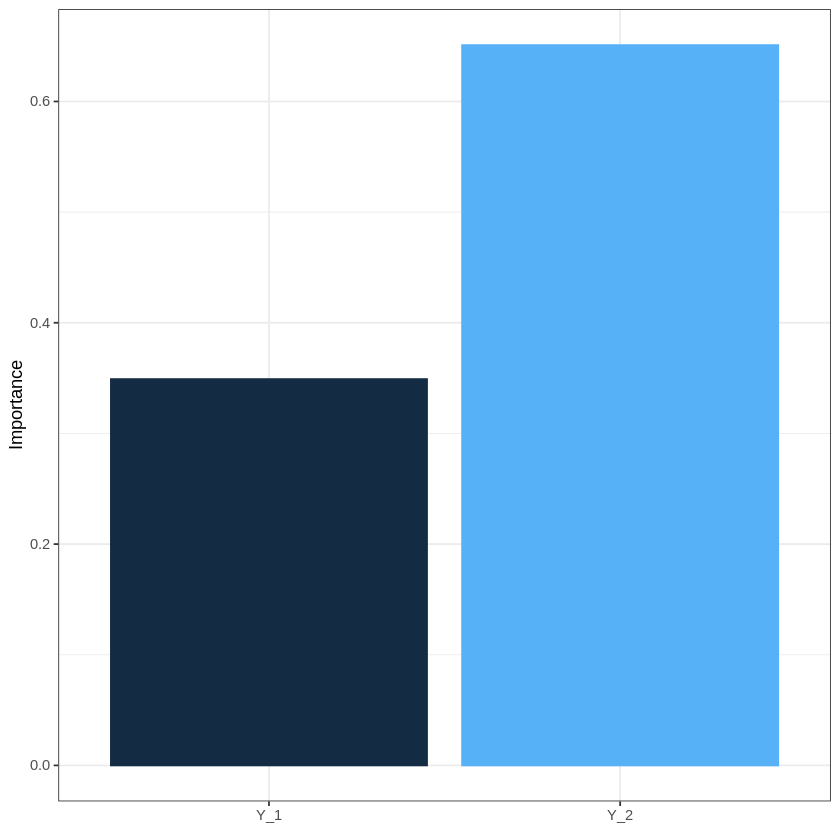

In [119]:
garson(model_0)